In [83]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer

In [3]:
data_file_path = "../data/raw/ACME-HappinessSurvey2020.csv"

In [4]:
data = pd.read_csv(data_file_path)
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [5]:
data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
data.shape

(126, 7)

In [7]:
data.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [8]:
data.duplicated().sum()

16

In [9]:
data.drop_duplicates(keep='first',inplace=True)
data.shape

(110, 7)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       110 non-null    int64
 1   X1      110 non-null    int64
 2   X2      110 non-null    int64
 3   X3      110 non-null    int64
 4   X4      110 non-null    int64
 5   X5      110 non-null    int64
 6   X6      110 non-null    int64
dtypes: int64(7)
memory usage: 6.9 KB


In [16]:
X = data.drop(['Y'], axis=1)
y = data['Y']

X_train_init, X_test_init, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=36, stratify=y)

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

X_train = numerical_transformer.fit_transform(X_train_init)
X_test = numerical_transformer.transform(X_test_init)

In [53]:
classifiers = {
        'LogisticRegression': {
            'model': LogisticRegression(),
            'params': {
                'C': [0.1, 1, 10],
                'penalty': ['l2']
            }
        },
        'SVC': {
            'model': SVC(),
            'params': {
                'C': [0.01, 0.1, 1, 10],
                'kernel': ['linear', 'rbf', 'poly']
            }
        },
        'KNeighborsClassifier': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [i for i in range(1, 10)],
                'weights': ['uniform', 'distance'],
                'p': [1, 2],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'leaf_size': [i for i in range(1, 5)]
            }
        },
        'DecisionTreeClassifier': {
            'model': DecisionTreeClassifier(),
            'params': {
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
        },
        'GaussianNB': {
            'model': GaussianNB(),
            'params': {}
        },
        'RandomForestClassifier': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [10, 50, 100],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
        },
    }

In [21]:
for classifier_name, classifier in classifiers.items():
    model = classifier['model']
    params = classifier['params']
    # kf = KFold(n_splits=len(X_train))
    kf = KFold(n_splits=5)
    scoring = make_scorer(f1_score, zero_division=1)
    grid_search = GridSearchCV(model, params, cv=kf, n_jobs=-1, scoring=scoring, verbose=0, return_train_score=True)
    grid_search.fit(X_train, y_train)

    train_score = grid_search.score(X_train, y_train)
    test_score = grid_search.score(X_test, y_test)
    print(f"{classifier_name}: Train Score: {train_score:.3f}, Test Score: {test_score:.3f}, Best Score: {grid_search.best_score_:.3f}")
    print(f"Best Params: {grid_search.best_params_}")

KNeighborsClassifier: Train Score: 0.698, Test Score: 0.700, Best Score: 0.6063897488820089
Best Params: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
DecisionTreeClassifier: Train Score: 0.868, Test Score: 0.471, Best Score: 0.5224908424908424
Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
GaussianNB: Train Score: 0.615, Test Score: 0.733, Best Score: 0.5197012138188609
Best Params: {}
RandomForestClassifier: Train Score: 0.806, Test Score: 0.452, Best Score: 0.5704024767801856
Best Params: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}
LogisticRegression: Train Score: 0.593, Test Score: 0.621, Best Score: 0.509
Best Params: {'C': 0.1, 'penalty': 'l2'}
SVC: Train Score: 0.709, Test Score: 0.696, Best Score: 0.607
Best Params: {'C': 0.1, 'kernel': 'poly'}
KNeighborsClassifier: Train Score: 0.698, Test Score: 0.700, Best Score: 0.606
Best Params: {'algorithm': 'auto', 'leaf_siz

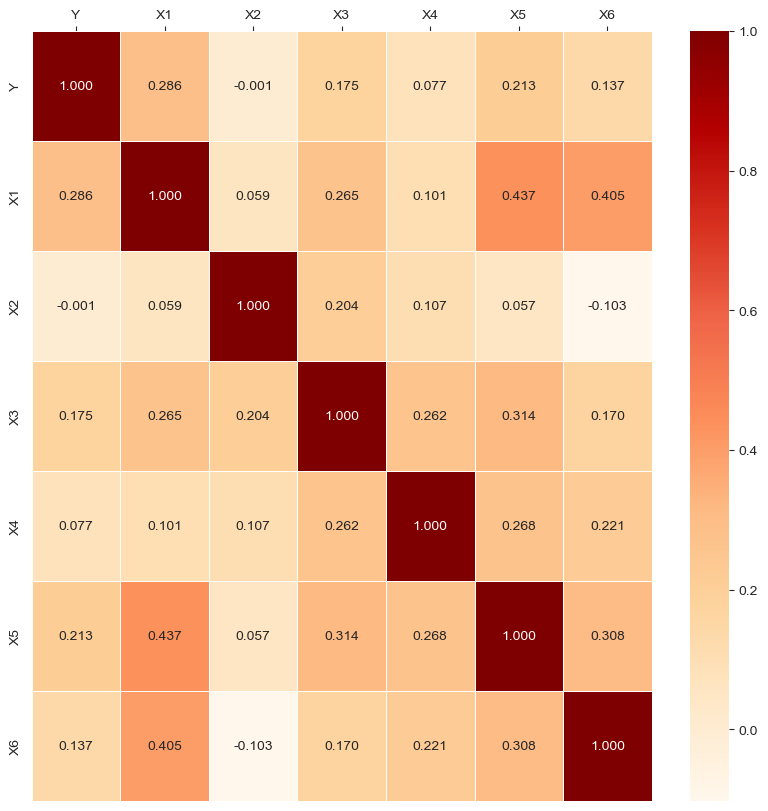

In [84]:
plt.figure(figsize=(10,10))
corr=data.corr()
ax=sns.heatmap(corr,annot=True,fmt='0.3f',linewidth=0.5,cmap='OrRd')
ax.xaxis.tick_top()
plt.show()

In [28]:
X = data.drop(['Y', 'X2', 'X4'], axis=1)
y = data['Y']

X_train_init, X_test_init, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=36, stratify=y)

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

X_train = numerical_transformer.fit_transform(X_train_init)
X_test = numerical_transformer.transform(X_test_init)

In [54]:
for classifier_name, classifier in classifiers.items():
    model = classifier['model']
    params = classifier['params']
    # kf = KFold(n_splits=len(X_train))
    kf = KFold(n_splits=5)
    scoring = make_scorer(f1_score, zero_division=1)
    grid_search = GridSearchCV(model, params, cv=kf, n_jobs=-1, scoring=scoring, verbose=0, return_train_score=True)
    # grid_search = GridSearchCV(model, params, cv=kf, n_jobs=-1, scoring=scoring, verbose=0, return_train_score=False)
    grid_search.fit(X_train, y_train)

    train_score = grid_search.score(X_train, y_train)
    test_score = grid_search.score(X_test, y_test)

    results_df = pd.DataFrame(grid_search.cv_results_)
    top_scores = results_df.sort_values(by='mean_test_score', ascending=False).iloc[:10]

    print(f"{classifier_name}: Train Score: {train_score:.3f}, Test Score: {test_score:.3f}")
    print(f"{top_scores[['mean_test_score', 'params']]}")

    # print(f"\tBest Params: {grid_search.best_params_}")
    print(f"-" * 60)

LogisticRegression: Train Score: 0.557, Test Score: 0.643
   mean_test_score                       params
0         0.529203  {'C': 0.1, 'penalty': 'l2'}
1         0.512210    {'C': 1, 'penalty': 'l2'}
2         0.512210   {'C': 10, 'penalty': 'l2'}
------------------------------------------------------------
SVC: Train Score: 0.709, Test Score: 0.651
    mean_test_score                           params
5          0.667194     {'C': 0.1, 'kernel': 'poly'}
8          0.647536       {'C': 1, 'kernel': 'poly'}
7          0.622265        {'C': 1, 'kernel': 'rbf'}
10         0.607613       {'C': 10, 'kernel': 'rbf'}
3          0.520612   {'C': 0.1, 'kernel': 'linear'}
9          0.508758    {'C': 10, 'kernel': 'linear'}
6          0.499608     {'C': 1, 'kernel': 'linear'}
11         0.470341      {'C': 10, 'kernel': 'poly'}
2          0.376285    {'C': 0.01, 'kernel': 'poly'}
0          0.370751  {'C': 0.01, 'kernel': 'linear'}
------------------------------------------------------------
KN

KNighborsClassifier looks like our best bet, let's dive deeper with it

In [85]:
n_neighbors = range(1,10)
weights = ['uniform', 'distance']
algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']
leafSizes = range(1,5)

best_train_score = 0
best_score = 0
best_params = None

for neighbors in n_neighbors:
    for weight in weights:
        for algorithm in algorithms:
            for leafSize in leafSizes:
                knc = KNeighborsClassifier(n_neighbors=neighbors, weights=weight, algorithm=algorithm, leaf_size=leafSize, p=1)
                knc.fit(X_train, y_train)
                y_train_pred = knc.predict(X_train)
                y_pred = knc.predict(X_test)

                train_score = f1_score(y_train, y_train_pred)
                f1 = f1_score(y_test, y_pred)

                if (f1 > best_score) and (train_score >= f1):
                    best_score = f1
                    best_train_score = train_score
                    # best_params = knc.get_params()
                    best_params = {'algorithm': algorithm, 'n_neighbors': neighbors, 'weights': weight, 'leaf_size': leafSize}
                    # print(f"{train_score:.3f}\t{f1:.3f}\t{{'algorithm': {algorithm}, 'n_neighbors': {neighbors}, 'weights': {weight}, 'leaf_size': {leafSize}}}")

print(f"{best_train_score:.3f}\t{best_score:.3f}\t{best_params}")

0.733	0.732	{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform', 'leaf_size': 2}


In [86]:
KNN = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto', leaf_size=2, p=1)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
score = f1_score(y_test, y_pred)
print(f"{score:.3f}")

0.732


[Text(0, 0.5, 'Unhappy'), Text(0, 1.5, 'Happy')]

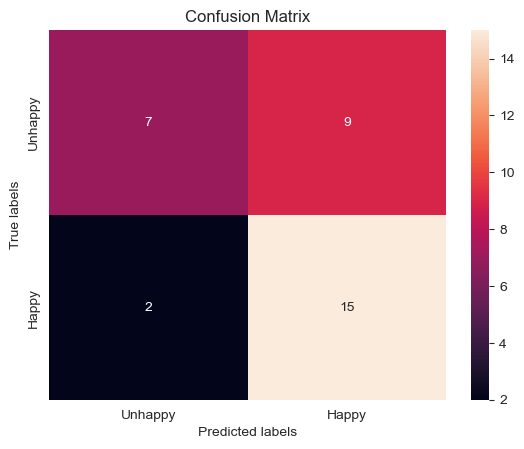

In [87]:
ax=plt.subplot()
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

# set labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Unhappy','Happy'])
ax.yaxis.set_ticklabels(['Unhappy', 'Happy'])